In [62]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        graph = filename.split('_')[0]
        algorithm = filename.split('_')[1]
        content = json.load(f)
        content['id'] = graph
        content['algorithm'] = algorithm
        results.append(content)

results = pd.DataFrame(results, columns=['id', 'initializationTime', 'executionTime', 'totalTime', 'algorithm'])
results

,id,initializationTime,executionTime,totalTime,algorithm
0,graph1,0.143276,0.000136,0.143412,parallel
1,graph1,0.000004,0.000003,0.000007,serial
2,graph2,0.119325,0.000093,0.119418,parallel
3,graph2,0.000004,0.000005,0.000010,serial
4,graph3,0.120835,0.001041,0.121876,parallel
5,graph3,0.000039,0.000944,0.000984,serial
6,graph4,0.121278,0.029076,0.150355,parallel
7,graph4,0.001709,23.664378,23.666088,serial
8,graph5,0.448153,7.986972,8.435126,parallel
9,graph6,1.228461,62.860549,64.089011,parallel


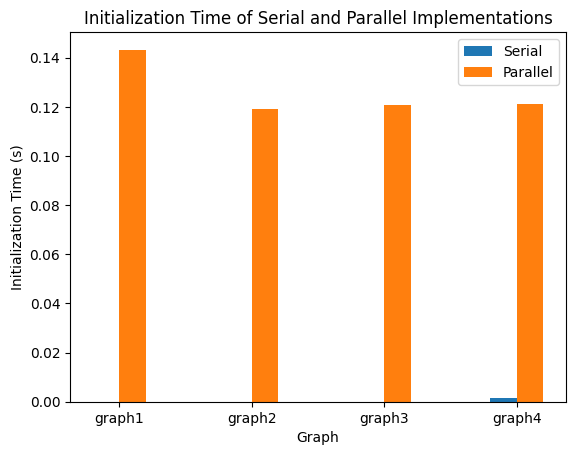

In [63]:
serial_results = results[results['algorithm'] == 'serial']
parallel_results = results[results['algorithm'] == 'parallel']
groups = min(len(serial_results),len(parallel_results))
serial_results = results[results['algorithm'] == 'serial'][:groups]
parallel_results = results[results['algorithm'] == 'parallel'][:groups]
x = np.arange(groups)
width = 0.2
plt.bar(x-0.1, serial_results['initializationTime'], label='Serial', width=width)
plt.bar(x+0.1, parallel_results['initializationTime'], label='Parallel', width=width)
plt.xticks(x, serial_results['id'])
plt.legend(['Serial', 'Parallel'])
plt.title('Initialization Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

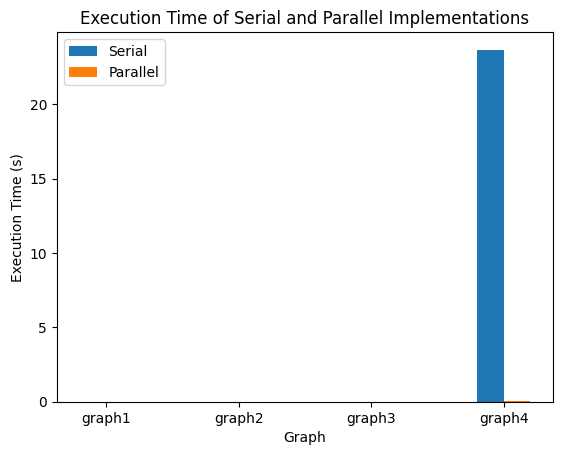

In [64]:
serial_results = results[results['algorithm'] == 'serial']
parallel_results = results[results['algorithm'] == 'parallel']
groups = min(len(serial_results),len(parallel_results))
serial_results = results[results['algorithm'] == 'serial'][:groups]
parallel_results = results[results['algorithm'] == 'parallel'][:groups]
x = np.arange(groups)
width = 0.2
plt.bar(x-0.1, serial_results['executionTime'], label='Serial', width=width)
plt.bar(x+0.1, parallel_results['executionTime'], label='Parallel', width=width)
plt.xticks(x, serial_results['id'])
plt.legend(['Serial', 'Parallel'])
plt.title('Execution Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.show()

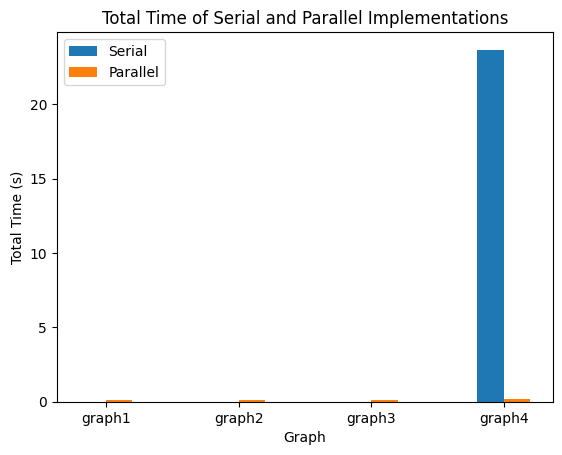

In [65]:
serial_results = results[results['algorithm'] == 'serial']
parallel_results = results[results['algorithm'] == 'parallel']
groups = min(len(serial_results),len(parallel_results))
serial_results = results[results['algorithm'] == 'serial'][:groups]
parallel_results = results[results['algorithm'] == 'parallel'][:groups]
x = np.arange(groups)
width = 0.2
plt.bar(x-0.1, serial_results['totalTime'], label='Serial', width=width)
plt.bar(x+0.1, parallel_results['totalTime'], label='Parallel', width=width)
plt.xticks(x, serial_results['id'])
plt.legend(['Serial', 'Parallel'])
plt.title('Total Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Total Time (s)')
plt.show()

<BarContainer object of 7 artists>

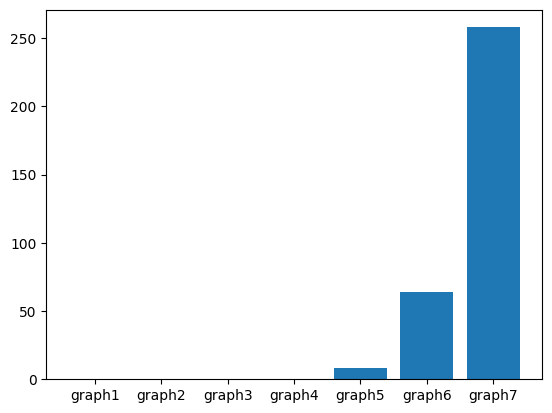

In [66]:
parallel_results = results[results['algorithm'] == 'parallel']
plt.bar(parallel_results['id'], parallel_results['totalTime'], label='Parallel')